In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np
pd.set_option('display.max_rows', 50)


In [312]:
simulated = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/runs_2013/demand_none-carbon_none-datetime_2019-08-08_09-27-18-capacity_52152.csv')
simulated.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,269097.12,296496.48,12574.927904,12490.43052,0.0,163428.881549,1955.52,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.063223e+10,64.442533,1231.241252
1,1,151462.08,289680.36,12663.542545,12497.15424,0.0,163428.881549,0.00,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,7.873103e+09,56.539096,959.583824
2,2,267084.72,288974.10,11658.160728,12340.26744,0.0,163428.881549,1955.52,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.185284e+10,61.471676,1227.092822
3,3,294325.92,291985.58,12562.865178,12522.92850,0.0,163428.881549,3259.20,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.787174e+10,64.982039,1296.709178
4,4,82072.08,214620.09,12500.672367,12497.15424,0.0,146987.366417,0.00,0,31272.0,17737.0,4783.0,2949.0,0.0,9238.0,672.0,23.62,6.998416e+09,46.768186,645.509162


In [313]:
simulated = simulated.rename(columns={'total_genco_wealth':'genco_wealth'})

In [314]:
simulated_long = pd.melt(simulated, id_vars='Unnamed: 0')
simulated_long

,Unnamed: 0,variable,value
0,0,contributed_CCGT,269097.120000
1,1,contributed_CCGT,151462.080000
2,2,contributed_CCGT,267084.720000
3,3,contributed_CCGT,294325.920000
4,4,contributed_CCGT,82072.080000
5,5,contributed_CCGT,284020.560000
6,6,contributed_CCGT,82589.760000
7,7,contributed_CCGT,113242.320000
8,8,contributed_CCGT,231211.440000
9,9,contributed_CCGT,120637.440000


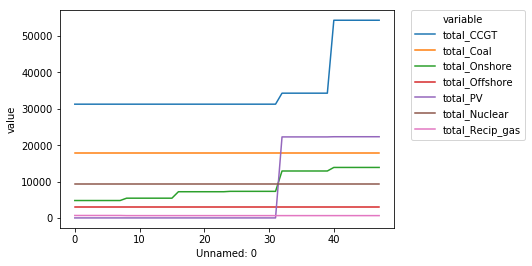

In [315]:
sns.lineplot(data=simulated_long[simulated_long['variable'].str.contains("total")], x='Unnamed: 0', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

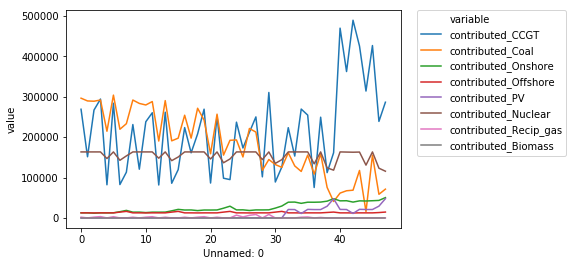

In [316]:
sns.lineplot(data=simulated_long[simulated_long['variable'].str.contains("contributed")], x='Unnamed: 0', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



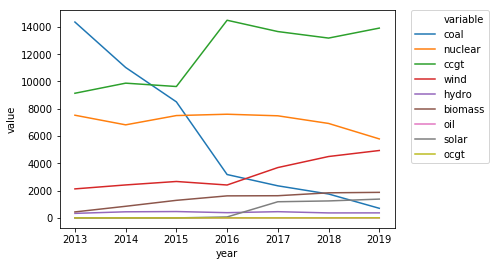

In [317]:
actual_yearly_mix = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/elecsim/data/processed/electricity_mix/energy_mix_historical.csv')
sns.lineplot(data=actual_yearly_mix[actual_yearly_mix.year>=2013], x='year', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [318]:
best_mix = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/best_run_all_dat/*.csv')],
                      ignore_index=True)
best_mix['run_id'] = np.repeat(list(range(int(len(best_mix)/48))), 48)
best_mix


,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,run_id
0,0,263890.08,301486.12,12574.927904,12490.430520,0.000000,163428.881549,1955.52,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.062764e+10,62.154885,1238.063404,0
1,1,150782.40,294233.92,12663.542545,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,8.134332e+09,54.364614,968.364878,0
2,2,266325.12,287112.86,11658.160728,12340.267440,0.000000,163428.881549,1955.52,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.115689e+10,63.660558,1224.782732,0
3,3,291132.00,295586.40,12562.865178,12522.928500,0.000000,163428.881549,3259.20,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,1.645922e+10,65.055612,1299.824295,0
4,4,85790.88,209067.18,12519.602402,12497.154240,0.000000,150520.394080,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,4.790309e+09,46.688873,640.667574,0
5,5,284542.56,302928.66,12663.542545,12497.154240,0.000000,163428.881549,3051.62,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,9.812918e+09,65.966115,1300.723162,0
6,6,78170.40,223418.32,15401.362598,14368.869795,0.000000,142697.314049,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,-8.258405e+09,46.316943,657.221104,0
7,7,111827.52,233870.02,18636.226753,16175.309235,0.000000,153198.359759,0.00,0,31272.0,...,4783.0,2949.0,0.0,9238.0,672.0,23.62,-2.810847e+10,47.542664,748.866960,0
8,8,223777.44,302106.32,12527.604320,12490.430520,0.000000,163428.881549,1235.78,0,31272.0,...,4765.0,2949.0,0.0,9238.0,632.0,23.62,-3.026151e+10,56.278448,1173.921394,0
9,9,133183.44,278442.68,12615.885475,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,4765.0,2949.0,0.0,9238.0,632.0,23.62,-3.677333e+10,50.439816,899.018978,0


In [319]:
def get_year(df):
    df['year'] = np.repeat(list(range(6)), 8)
    return df

best_mix_year = best_mix.groupby('run_id').apply(get_year)  
best_mix_year

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,run_id,year
0,0,263890.08,301486.12,12574.927904,12490.430520,0.000000,163428.881549,1955.52,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,1.062764e+10,62.154885,1238.063404,0,0
1,1,150782.40,294233.92,12663.542545,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,8.134332e+09,54.364614,968.364878,0,0
2,2,266325.12,287112.86,11658.160728,12340.267440,0.000000,163428.881549,1955.52,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,1.115689e+10,63.660558,1224.782732,0,0
3,3,291132.00,295586.40,12562.865178,12522.928500,0.000000,163428.881549,3259.20,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,1.645922e+10,65.055612,1299.824295,0,0
4,4,85790.88,209067.18,12519.602402,12497.154240,0.000000,150520.394080,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,4.790309e+09,46.688873,640.667574,0,0
5,5,284542.56,302928.66,12663.542545,12497.154240,0.000000,163428.881549,3051.62,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,9.812918e+09,65.966115,1300.723162,0,0
6,6,78170.40,223418.32,15401.362598,14368.869795,0.000000,142697.314049,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,-8.258405e+09,46.316943,657.221104,0,0
7,7,111827.52,233870.02,18636.226753,16175.309235,0.000000,153198.359759,0.00,0,31272.0,...,2949.0,0.0,9238.0,672.0,23.62,-2.810847e+10,47.542664,748.866960,0,0
8,8,223777.44,302106.32,12527.604320,12490.430520,0.000000,163428.881549,1235.78,0,31272.0,...,2949.0,0.0,9238.0,632.0,23.62,-3.026151e+10,56.278448,1173.921394,0,1
9,9,133183.44,278442.68,12615.885475,12497.154240,0.000000,163428.881549,0.00,0,31272.0,...,2949.0,0.0,9238.0,632.0,23.62,-3.677333e+10,50.439816,899.018978,0,1


In [320]:
contributed_results = best_mix_year.filter(regex='contributed_')
contributed_results *= 1/24

contributed_results['year'] = best_mix_year['year']
contributed_results['run_id'] = best_mix_year['run_id']

contributed_results = contributed_results.rename(columns={'contributed_PV': "contributed_solar"})
# contributed_results
cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])

contributed_results['contributed_Wind'] = contributed_results['contributed_Offshore'] +  contributed_results['contributed_Onshore']
contributed_results = contributed_results.drop(['contributed_Offshore', 'contributed_Onshore'], axis=1)
contributed_results

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,10995.420000,12561.921667,0.000000,6809.536731,81.480000,0.0,0,0,1044.389934
1,6282.600000,12259.746667,0.000000,6809.536731,0.000000,0.0,0,0,1048.362366
2,11096.880000,11963.035833,0.000000,6809.536731,81.480000,0.0,0,0,999.934507
3,12130.500000,12316.100000,0.000000,6809.536731,135.800000,0.0,0,0,1045.241403
4,3574.620000,8711.132500,0.000000,6271.683087,0.000000,0.0,0,0,1042.364860
5,11855.940000,12622.027500,0.000000,6809.536731,127.150833,0.0,0,0,1048.362366
6,3257.100000,9309.096667,0.000000,5945.721419,0.000000,0.0,0,0,1240.426350
7,4659.480000,9744.584167,0.000000,6383.264990,0.000000,0.0,0,0,1450.480666
8,9324.060000,12587.763333,0.000000,6809.536731,51.490833,0.0,1,0,1042.418118
9,5549.310000,11601.778333,0.000000,6809.536731,0.000000,0.0,1,0,1046.376655


In [321]:

def get_weighted_average(df):
    return df.apply(lambda x: np.average(x, weights=cluster_size.values))

results_wa = contributed_results.groupby(['run_id','year']).apply(lambda x: get_weighted_average(x)).reset_index(drop=True)
results_wa

,contributed_CCGT,contributed_Coal,contributed_solar,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,year,run_id,contributed_Wind
0,7111.448055,10777.139598,0.000000,6489.478017,43.539491,0.0,0.0,0.0,1168.992065
1,6497.804466,10267.524974,0.000000,6426.485438,32.916662,0.0,1.0,0.0,1165.756758
2,6120.853315,9331.648987,0.000000,6414.757787,32.018637,0.0,2.0,0.0,1170.672698
3,7276.048192,6434.645129,0.000000,6369.783139,109.409135,0.0,3.0,0.0,1242.825967
4,7356.139699,4824.064124,756.661322,6079.386617,47.177877,0.0,4.0,0.0,1501.239611
5,17791.966195,1664.679021,769.397743,6018.885024,0.000000,0.0,5.0,0.0,1750.888576
6,7134.419096,10757.594132,0.000000,6477.334009,45.465096,0.0,0.0,1.0,1168.769341
7,6240.755589,9620.985871,0.000000,6237.648395,31.587452,0.0,1.0,1.0,2306.755389
8,5834.595945,8783.966261,0.000000,6165.333406,28.350132,0.0,2.0,1.0,2397.782192
9,7033.375151,5902.738774,0.000000,6136.920199,151.130208,0.0,3.0,1.0,2393.082236


In [322]:
hist_long = pd.melt(results_wa, id_vars=["run_id", "year"])
hist_long.head()

,run_id,year,variable,value
0,0.0,0.0,contributed_CCGT,7111.448055
1,0.0,1.0,contributed_CCGT,6497.804466
2,0.0,2.0,contributed_CCGT,6120.853315
3,0.0,3.0,contributed_CCGT,7276.048192
4,0.0,4.0,contributed_CCGT,7356.139699


In [323]:
hist_long['variable'] = hist_long.variable.str.split("_").str[-1].str.lower()
hist_long['year'] = hist_long['year'] + 2013
hist_long

,run_id,year,variable,value
0,0.0,2013.0,ccgt,7111.448055
1,0.0,2014.0,ccgt,6497.804466
2,0.0,2015.0,ccgt,6120.853315
3,0.0,2016.0,ccgt,7276.048192
4,0.0,2017.0,ccgt,7356.139699
5,0.0,2018.0,ccgt,17791.966195
6,1.0,2013.0,ccgt,7134.419096
7,1.0,2014.0,ccgt,6240.755589
8,1.0,2015.0,ccgt,5834.595945
9,1.0,2016.0,ccgt,7033.375151


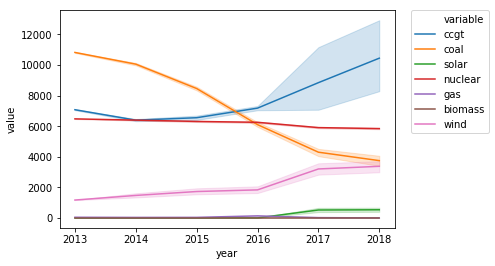

In [324]:
sns.lineplot(data=hist_long, x="year", y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hist_long['type'] = 'Predicted'

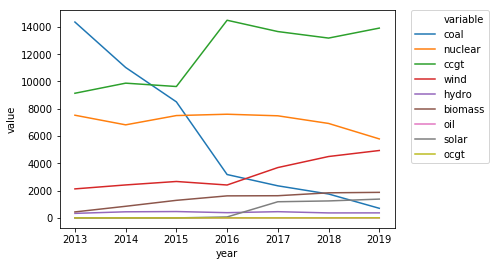

In [325]:
sns.lineplot(data=actual_yearly_mix[actual_yearly_mix.year>=2013], x='year', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [326]:
actual = actual_yearly_mix[(actual_yearly_mix.year>=2013) & (actual_yearly_mix.year<2019)]
actual['type'] = 'Actual'
actual = actual.drop('Unnamed: 0', axis=1)
actual = actual[actual['variable'].isin(['coal','ccgt','wind','solar','nuclear'])]
actual['run_id'] = -1
actual

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,variable,value,type,run_id
2,2013,coal,14355.798134,Actual,-1
3,2014,coal,11025.881341,Actual,-1
4,2015,coal,8506.284996,Actual,-1
5,2016,coal,3179.857257,Actual,-1
6,2017,coal,2352.489874,Actual,-1
7,2018,coal,1753.406904,Actual,-1
11,2013,nuclear,7526.513864,Actual,-1
12,2014,nuclear,6821.166719,Actual,-1
13,2015,nuclear,7501.486303,Actual,-1
14,2016,nuclear,7599.286954,Actual,-1


In [327]:
both = pd.concat([actual, hist_long])
both.head()

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,run_id,type,value,variable,year
2,-1.0,Actual,14355.798134,coal,2013.0
3,-1.0,Actual,11025.881341,coal,2014.0
4,-1.0,Actual,8506.284996,coal,2015.0
5,-1.0,Actual,3179.857257,coal,2016.0
6,-1.0,Actual,2352.489874,coal,2017.0


In [328]:
def get_mix(df):
    df['value_perc'] = df['value']/sum(df['value'])*100
    return df.reset_index()

both_mix = both.groupby(['year','type','run_id']).apply(lambda x: get_mix(x))
both_mix = both_mix.rename(columns={"type":"Type", "variable":'Technology'})
both_mix['Technology'] = both_mix['Technology'].map({'coal': "Coal", 'ccgt': "CCGT", 'nuclear':"Nuclear", "wind":"Wind","solar":"Solar"})
both_mix

index  run_id       Type         value Technology  \
year   type      run_id                                                        
2013.0 Actual    -1.0   0      2    -1.0     Actual  14355.798134       Coal   
                        1     11    -1.0     Actual   7526.513864    Nuclear   
                        2     20    -1.0     Actual   9135.930888       CCGT   
                        3     29    -1.0     Actual   2127.126709       Wind   
                        4     65    -1.0     Actual      0.000000      Solar   
       Predicted  0.0   0      0     0.0  Predicted   7111.448055       CCGT   
                        1    282     0.0  Predicted  10777.139598       Coal   
                        2    564     0.0  Predicted      0.000000      Solar   
                        3    846     0.0  Predicted   6489.478017    Nuclear   
                        4   1128     0.0  Predicted     43.539491        NaN   
                        5   1410     0.0  Predicted      0.000000        NaN   
                        6   1692     0.0  Predicted   1168.992065       Wind   
                  1.0   0      6     1.0  Predicted   7134.419096       CCGT   
                        1    288     1.0  Predicted  10757.594132       Coal   
                        2    570     1.0  Predicted      0.000000      Solar   
                        3    852     1.0  Predicted   6477.334009    Nuclear   
                        4   1134     1.0  Predicted     45.465096        NaN   
                        5   1416     1.0  Predicted      0.000000        NaN   
                        6   1698     1.0  Predicted   1168.769341       Wind   
                  2.0   0     12     2.0  Predicted   7094.553945       CCGT   
                        1    294     2.0  Predicted  10874.513501       Coal   
                        2    576     2.0  Predicted      0.000000      Solar   
                        3    858     2.0  Predicted   6446.789374    Nuclear   
                        4   1140     2.0  Predicted     43.480804        NaN   
                        5   1422     2.0  Predicted      0.000000        NaN   
...                          ...     ...        ...           ...        ...   
2018.0 Predicted  43.0  3   1109    43.0  Predicted   6015.549882    Nuclear   
                        4   1391    43.0  Predicted      0.000000        NaN   
                        5   1673    43.0  Predicted      0.000000        NaN   
                        6   1955    43.0  Predicted   2423.503935       Wind   
                  44.0  0    269    44.0  Predicted   5755.183562       CCGT   
                        1    551    44.0  Predicted   4378.866019       Coal   
                        2    833    44.0  Predicted    850.052880      Solar   
                        3   1115    44.0  Predicted   5758.444029    Nuclear   
                        4   1397    44.0  Predicted      0.000000        NaN   
                        5   1679    44.0  Predicted      0.000000        NaN   
                        6   1961    44.0  Predicted   3685.773343       Wind   
                  45.0  0    275    45.0  Predicted   5323.239342       CCGT   
                        1    557    45.0  Predicted   5191.988358       Coal   
                        2    839    45.0  Predicted    372.455715      Solar   
                        3   1121    45.0  Predicted   5833.926373    Nuclear   
                        4   1403    45.0  Predicted      0.000000        NaN   
                        5   1685    45.0  Predicted      0.000000        NaN   
                        6   1967    45.0  Predicted   3445.617020       Wind   
                  46.0  0    281    46.0  Predicted   9729.035055       CCGT   
                        1    563    46.0  Predicted   4390.033733       Coal   
                        2    845    46.0  Predicted    976.232514      Solar   
                        3   1127    46.0  Predicted   5916.232652    Nuclear   
                        4  

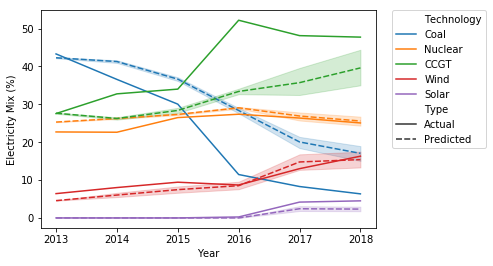

In [329]:
sns.lineplot(data=both_mix, x='year', y='value_perc', style='Type', hue='Technology')
plt.ylabel("Electricity Mix (%)")
plt.xlabel("Year")
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/notebooks/validation-optimisation/figures/results/throughout_years.pdf',dpi=500, bbox_extra_artists=(lgd,), bbox_inches='tight')

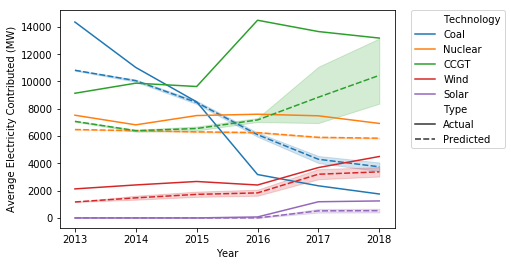

In [330]:
sns.lineplot(data=both_mix, x='year', y='value', hue='Technology', style='Type')
plt.ylabel("Average Electricity Contributed (MW)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)